# PIZZA SALES ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

## Import the required libraries

In [2]:
df = pd.read_csv("pizza_sales.csv")

## Importing the dataset

In [3]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


## Metadata of Data

In [4]:
print("The Metatdata of the dataset:", df.shape)

The Metatdata of the dataset: (48620, 12)


In [5]:
print("No.of Rows in the dataset:", df.shape[0])

No.of Rows in the dataset: 48620


In [6]:
print("No.of Column in the dataset:", df.shape[1])

No.of Column in the dataset: 12


In [7]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_name_id      48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  datetime64[ns]
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
 12  day_name           48620 non-null  category      
 13  order_hour         48620 non-null  int32         
 14  month_

## Data Types in Raw Data

In [9]:
df.dtypes

pizza_id               int64
order_id               int64
pizza_name_id         object
quantity               int64
order_date            object
order_time            object
unit_price           float64
total_price          float64
pizza_size            object
pizza_category        object
pizza_ingredients     object
pizza_name            object
dtype: object

In [10]:
df.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


### KPI's

In [11]:
# Calculate KPIs
total_revenue = df['total_price'].sum()
total_pizzas_sold = df['quantity'].sum()
total_orders = df['order_id'].nunique()

avg_order_value = total_revenue / total_orders
avg_pizzas_per_order = total_pizzas_sold / total_orders

# Print results
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Pizzas Sold: {total_pizzas_sold:,}")
print(f"Total Orders: {total_orders:,}")
print(f"Avg Order Value: ${avg_order_value:,.2f}")
print(f"Average Pizzas per Order: {avg_pizzas_per_order:.2f}")


Total Revenue: $817,860.05
Total Pizzas Sold: 49,574
Total Orders: 21,350
Avg Order Value: $38.31
Average Pizzas per Order: 2.32


### Ingredient Analysis

In [12]:
# Split ingredients, explode into rows, clean, and count
ingredient = (
    df['pizza_ingredients']
    .str.split(',')
    .explode()
    .str.strip()
    .value_counts()
    .reset_index()
    .rename(columns={
        'index': 'Ingredient',
        'pizza_ingredients': 'Ingredients'
    })
)

# Display top 10 ingredients
print(ingredient.head(10))


         Ingredients  count
0             Garlic  27422
1           Tomatoes  26601
2         Red Onions  19547
3        Red Peppers  16284
4  Mozzarella Cheese  10333
5          Pepperoni  10300
6            Spinach  10012
7          Mushrooms   9624
8            Chicken   8443
9          Capocollo   6572


### Daily Trend - Total Orders

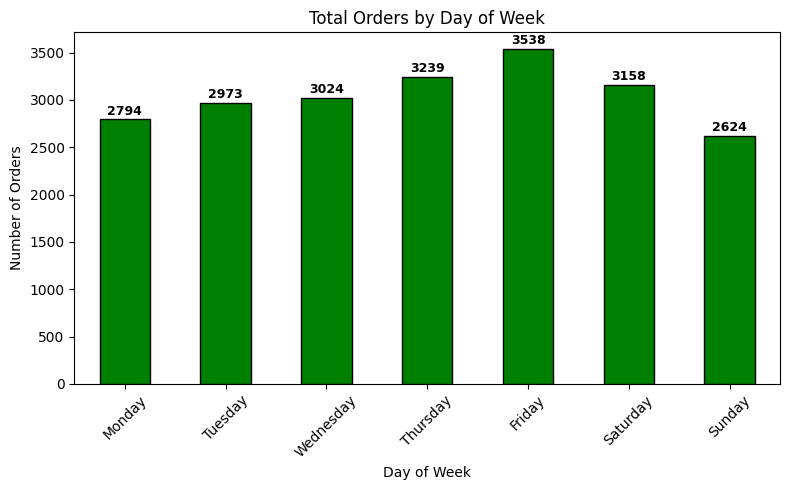

In [13]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)
df['day_name'] = df['order_date'].dt.day_name()

weekday_order = [
    "Monday", "Tuesday", "Wednesday",
    "Thursday", "Friday", "Saturday", "Sunday"
]

df['day_name'] = pd.Categorical(
    df['day_name'],
    categories=weekday_order,
    ordered=True
)

orders_by_day = df.groupby('day_name', observed=False)['order_id'].nunique()

ax = orders_by_day.plot(
    kind='bar',
    figsize=(8, 5),
    color='green',
    edgecolor='black'
)

plt.title("Total Orders by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)

for i, val in enumerate(orders_by_day):
    plt.text(i, val + 20, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


### Daily Trend - Total Revenue

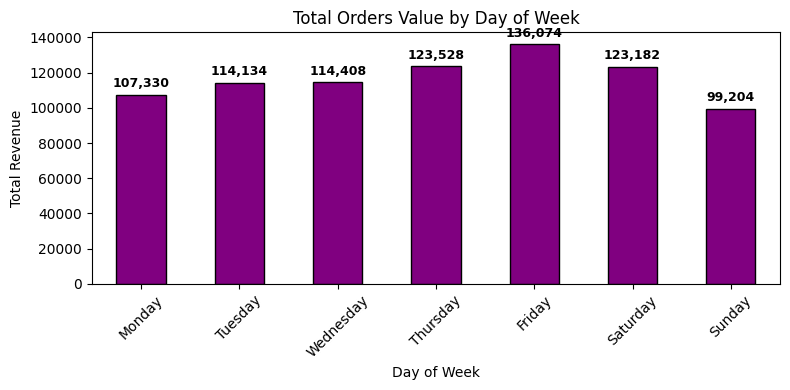

In [30]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)
df['day_name'] = df['order_date'].dt.day_name()

weekday_order = [
    "Monday", "Tuesday", "Wednesday",
    "Thursday", "Friday", "Saturday", "Sunday"
]

df['day_name'] = pd.Categorical(
    df['day_name'],
    categories=weekday_order,
    ordered=True
)

orders_by_day = df.groupby('day_name', observed=False)['total_price'].sum()

ax = orders_by_day.plot(
    kind='bar',
    figsize=(8, 4),
    color='purple',
    edgecolor='black'
)

plt.title("Total Orders Value by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)

for i, val in enumerate(orders_by_day):
    plt.text(i, val + (orders_by_day.max() * 0.02), f"{val:,.0f}", ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


### Hourly Trend - Total Orders

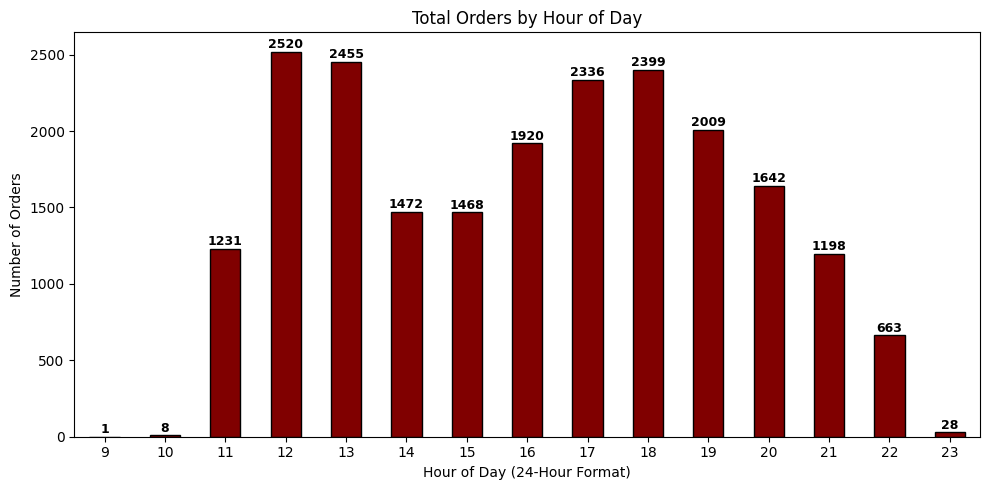

In [15]:
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S')
df['order_hour'] = df['order_time'].dt.hour

orders_by_hour = df.groupby('order_hour', observed=False)['order_id'].nunique()

ax = orders_by_hour.plot(
    kind='bar',
    figsize=(10, 5),
    color='maroon',
    edgecolor='black'
)

plt.title("Total Orders by Hour of Day")
plt.xlabel("Hour of Day (24-Hour Format)")
plt.ylabel("Number of Orders")
plt.xticks(rotation=0)

for i, val in enumerate(orders_by_hour):
    plt.text(i, val + 5, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


### Monthly Trend - Total Orders

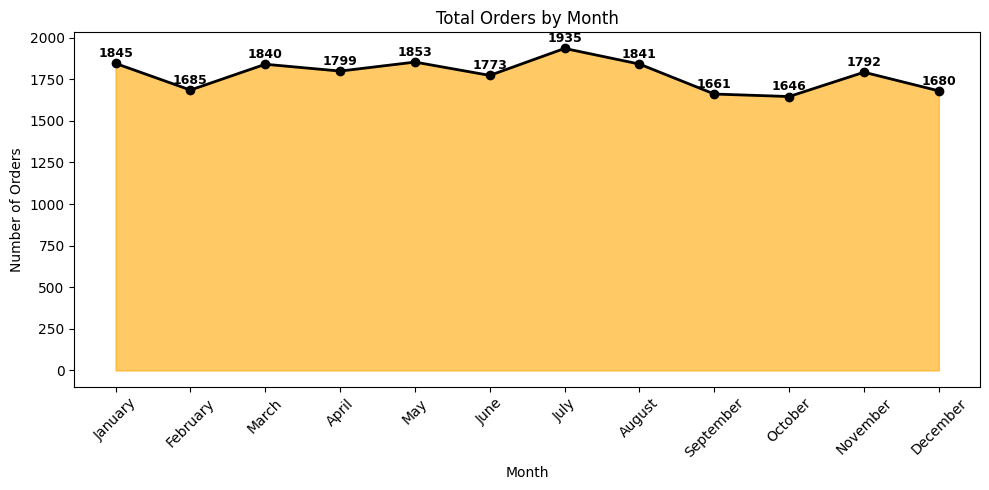

In [16]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)
df['month_name'] = df['order_date'].dt.month_name()

month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

df['month_name'] = pd.Categorical(
    df['month_name'],
    categories=month_order,
    ordered=True
)

orders_by_month = df.groupby('month_name', observed=False)['order_id'].nunique()

plt.figure(figsize=(10, 5))
plt.fill_between(
    orders_by_month.index.astype(str),
    orders_by_month.values,
    color="orange",
    alpha=0.6
)
plt.plot(
    orders_by_month.index.astype(str),
    orders_by_month.values,
    color="black",
    linewidth=2,
    marker='o'
)

plt.title("Total Orders by Month")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)

for i, val in enumerate(orders_by_month):
    plt.text(i, val + 20, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


### % of Sales by Category

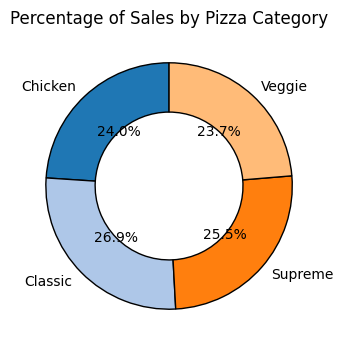

In [17]:
category_sales = df.groupby('pizza_category')['total_price'].sum()
category_pct = category_sales / category_sales.sum() * 100

plt.figure(figsize=(4, 4))
colors = plt.get_cmap('tab20').colors

plt.pie(
    category_pct,
    labels=category_pct.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'width': 0.4}
)

plt.title("Percentage of Sales by Pizza Category")
plt.show()


### % Sales by Pizza Size & Category

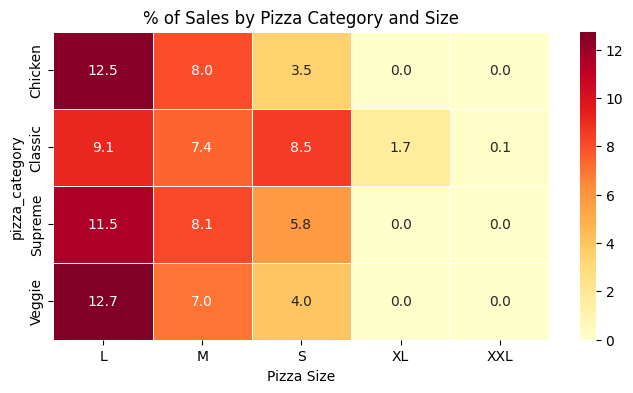

In [18]:
sales_pivot = df.pivot_table(
    index='pizza_category',
    columns='pizza_size',
    values='total_price',
    aggfunc='sum',
    fill_value=0
)

sales_pct = sales_pivot / sales_pivot.sum().sum() * 100

plt.figure(figsize=(8, 4))
plt.title("% of Sales by Pizza Category and Size")
plt.ylabel("Pizza Category")

sns.heatmap(
    sales_pct,
    annot=True,
    fmt=".1f",
    cmap="YlOrRd",
    linewidths=0.5
)

plt.xlabel("Pizza Size")
plt.show()


### Total Pizzas Sold by Pizza category

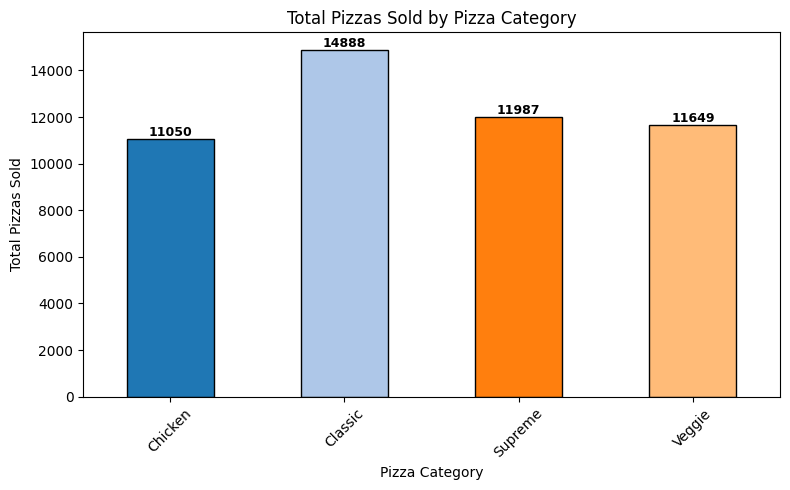

In [19]:
pizzas_by_category = df.groupby('pizza_category')['quantity'].sum()

colors = list(plt.get_cmap('tab20').colors)
colors = colors[:len(pizzas_by_category)]

ax = pizzas_by_category.plot(
    kind='bar',
    figsize=(8, 5),
    color=colors,
    edgecolor='black'
)

plt.title("Total Pizzas Sold by Pizza Category")
plt.xlabel("Pizza Category")
plt.ylabel("Total Pizzas Sold")
plt.xticks(rotation=45)

for i, val in enumerate(pizzas_by_category):
    plt.text(i, val + 5, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


### Top 5 Best-Selling Pizzas - Total Qty

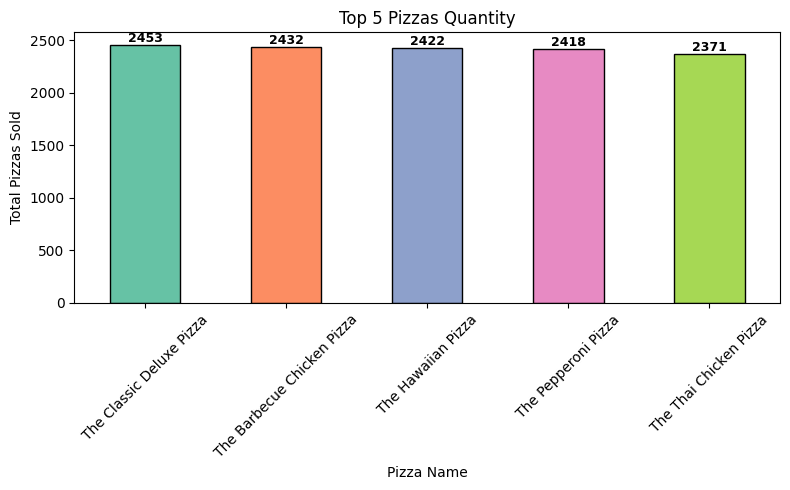

In [21]:
pizzas_by_name = df.groupby('pizza_name')['quantity'].sum()
top5 = pizzas_by_name.sort_values(ascending=False).head(5)

colors = list(plt.get_cmap('Set2').colors)
colors = colors[:len(top5)]

ax = top5.plot(kind='bar', figsize=(8, 5), color=colors, edgecolor='black')

plt.title("Top 5 Pizzas Quantity")
plt.xlabel("Pizza Name")
plt.ylabel("Total Pizzas Sold")
plt.xticks(rotation=45)

for i, val in enumerate(top5):
    plt.text(i, val + 2, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


### Top 5 Best-Selling Pizzas - Total Orders

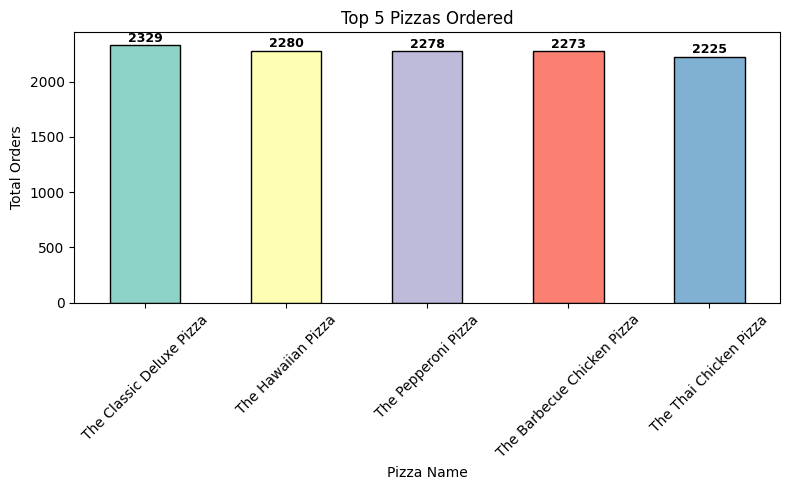

In [22]:
pizzas_by_name = df.groupby('pizza_name')['order_id'].nunique()
top5 = pizzas_by_name.sort_values(ascending=False).head(5)

colors = list(plt.get_cmap('Set3').colors)
colors = colors[:len(top5)]

ax = top5.plot(kind='bar', figsize=(8, 5), color=colors, edgecolor='black')

plt.title("Top 5 Pizzas Ordered")
plt.xlabel("Pizza Name")
plt.ylabel("Total Orders")
plt.xticks(rotation=45)

for i, val in enumerate(top5):
    plt.text(i, val + 2, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


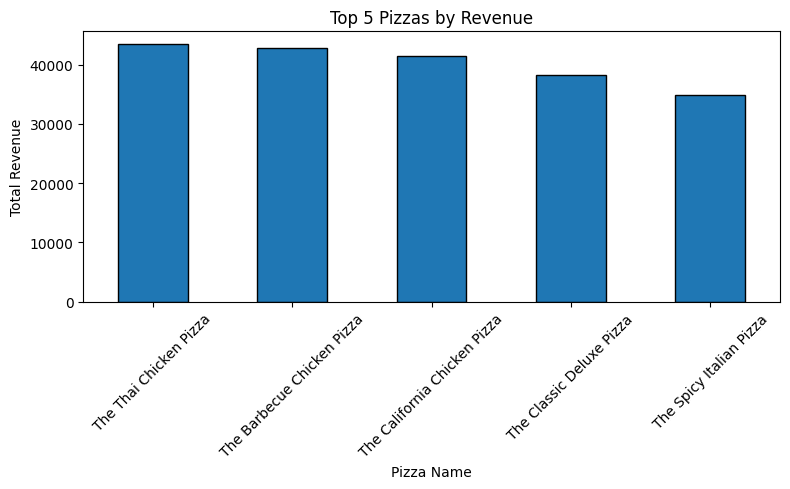

In [31]:
top5_revenue = (
    df.groupby("pizza_name")["total_price"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

plt.figure(figsize=(8,5))
top5_revenue.plot(kind="bar", edgecolor="black")
plt.title("Top 5 Pizzas by Revenue")
plt.xlabel("Pizza Name")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


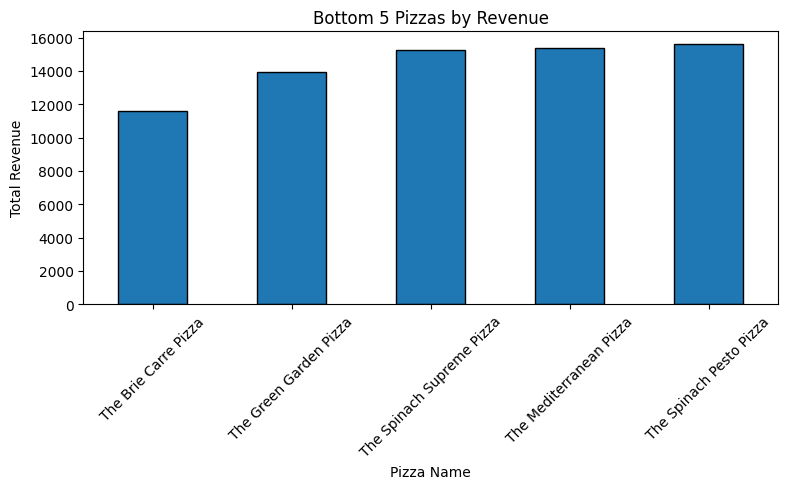

In [34]:
bottom5_revenue = (
    df.groupby("pizza_name")["total_price"]
    .sum()
    .sort_values(ascending=True)
    .head(5)
)

plt.figure(figsize=(8,5))
bottom5_revenue.plot(kind="bar", edgecolor="black")
plt.title("Bottom 5 Pizzas by Revenue")
plt.xlabel("Pizza Name")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


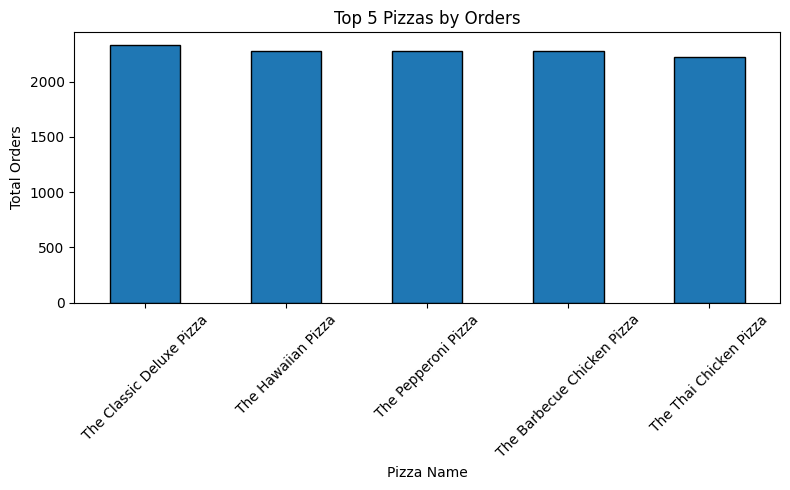

In [32]:
top5_orders = (
    df.groupby("pizza_name")["order_id"]
    .nunique()
    .sort_values(ascending=False)
    .head(5)
)

plt.figure(figsize=(8,5))
top5_orders.plot(kind="bar", edgecolor="black")
plt.title("Top 5 Pizzas by Orders")
plt.xlabel("Pizza Name")
plt.ylabel("Total Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


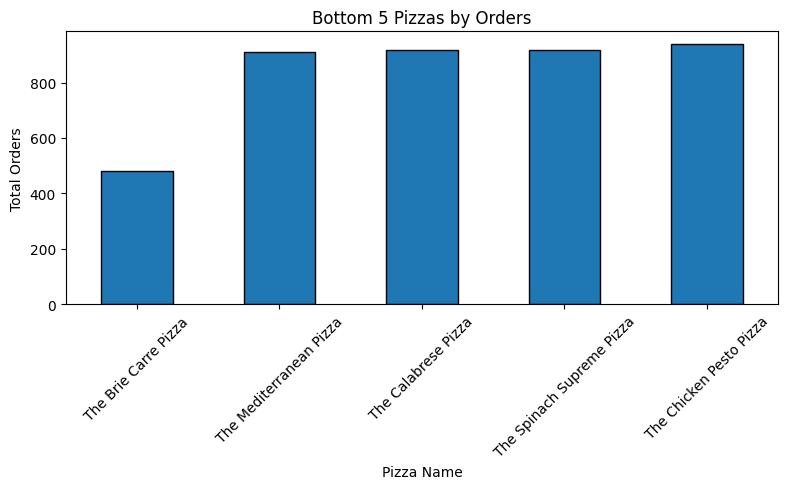

In [35]:
bottom5_orders = (
    df.groupby("pizza_name")["order_id"]
    .nunique()
    .sort_values(ascending=True)
    .head(5)
)

plt.figure(figsize=(8,5))
bottom5_orders.plot(kind="bar", edgecolor="black")
plt.title("Bottom 5 Pizzas by Orders")
plt.xlabel("Pizza Name")
plt.ylabel("Total Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


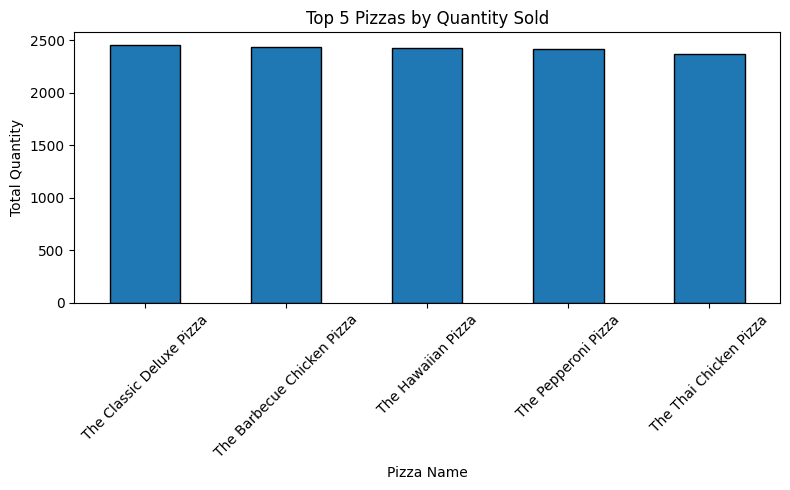

In [33]:
top5_quantity = (
    df.groupby("pizza_name")["quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

plt.figure(figsize=(8,5))
top5_quantity.plot(kind="bar", edgecolor="black")
plt.title("Top 5 Pizzas by Quantity Sold")
plt.xlabel("Pizza Name")
plt.ylabel("Total Quantity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


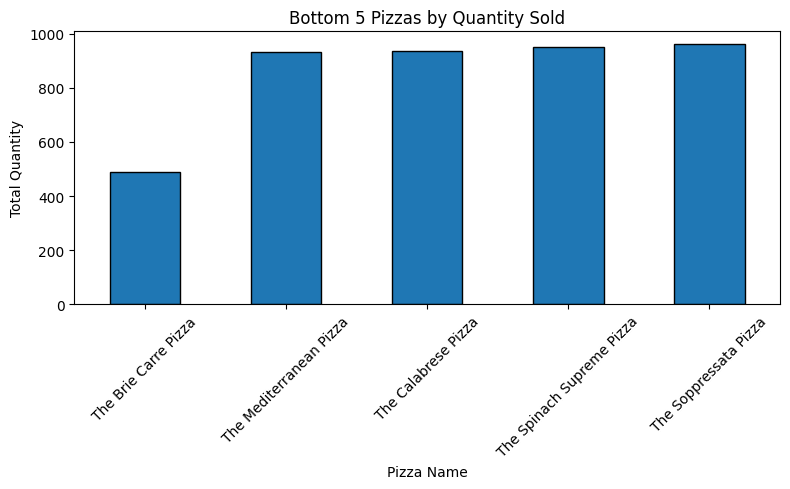

In [36]:
bottom5_quantity = (
    df.groupby("pizza_name")["quantity"]
    .sum()
    .sort_values(ascending=True)
    .head(5)
)

plt.figure(figsize=(8,5))
bottom5_quantity.plot(kind="bar", edgecolor="black")
plt.title("Bottom 5 Pizzas by Quantity Sold")
plt.xlabel("Pizza Name")
plt.ylabel("Total Quantity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
